In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(r'C:\Users\samue\OneDrive\Desktop\Group_Project_Data_SFD_Data_Toronto_Police.xlsx', sheet_name='Shooting_and_Firearm_Discharges')

In [10]:
# transform the the day of week into numerical
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['OCC_MONTH'] = df['OCC_MONTH'].str.slice(stop=3).map(month_dict)


map_day = {"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5, "Saturday":6, "Sunday":7}
df["OCC_DOW"] = df["OCC_DOW"].map(map_day)

map_range = {"Morning":"1_Morning","Afternoon":"2_Afternoon","Evening":"3_Evening","Night":"4_Night"}
df["OCC_TIME_RANGE"] = df["OCC_TIME_RANGE"].map(map_range)

# create a new dataframe based on variables identified and count of incident
df_case = df[["EVENT_UNIQUE_ID", "OCC_MONTH", "OCC_DOW", "OCC_TIME_RANGE", "NEIGHBOURHOOD_158"]]
df_case_grouped = df_case.groupby(["OCC_MONTH", "OCC_DOW", "OCC_TIME_RANGE", "NEIGHBOURHOOD_158"],as_index=False).count()

# classify the neighborhood based on quartile
neighborhood = df_case_grouped.groupby("NEIGHBOURHOOD_158")["EVENT_UNIQUE_ID"].sum().to_frame().reset_index()
neighborhood["neighborhood_group"] = pd.qcut(neighborhood["EVENT_UNIQUE_ID"], q=4, labels=["low","medium","high","very high"])

# merge the neighborhood into the new dataframe
df_case_grouped = df_case_grouped.merge(neighborhood[["NEIGHBOURHOOD_158","neighborhood_group"]], on="NEIGHBOURHOOD_158", how='left')
df_case_grouped

,OCC_MONTH,OCC_DOW,OCC_TIME_RANGE,NEIGHBOURHOOD_158,EVENT_UNIQUE_ID,neighborhood_group
0,1,1,1_Morning,Corso Italia-Davenport,1,medium
1,1,1,1_Morning,Danforth East York,1,low
2,1,1,1_Morning,Mimico-Queensway,1,medium
3,1,1,1_Morning,O'Connor-Parkview,1,high
4,1,1,2_Afternoon,Beechborough-Greenbrook,1,high
...,...,...,...,...,...,...
4786,12,7,4_Night,Westminster-Branson,2,medium
4787,12,7,4_Night,Weston-Pelham Park,1,high
4788,12,7,4_Night,Woburn North,1,very high
4789,12,7,4_Night,Yonge-Bay Corridor,3,very high


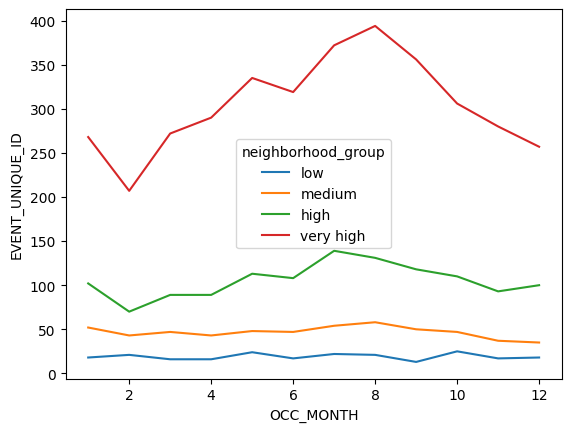

In [11]:
df_case_grouped_month = df_case_grouped.groupby(["OCC_MONTH","neighborhood_group"], as_index=False).sum()
sns.lineplot(data=df_case_grouped_month, x="OCC_MONTH", y="EVENT_UNIQUE_ID", hue="neighborhood_group")
plt.show()

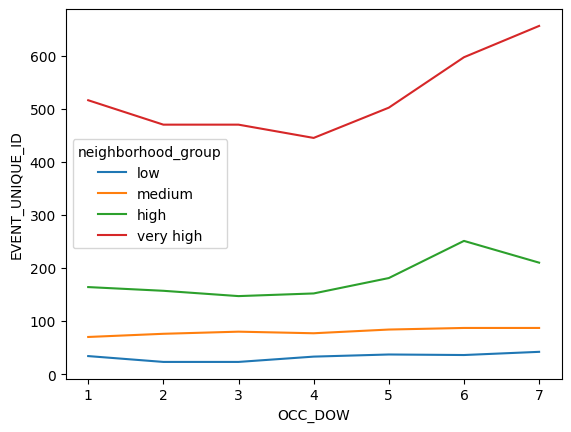

In [12]:
df_case_grouped_month = df_case_grouped.groupby(["OCC_DOW","neighborhood_group"], as_index=False).sum()
sns.lineplot(data=df_case_grouped_month, x="OCC_DOW", y="EVENT_UNIQUE_ID", hue="neighborhood_group")
plt.show()

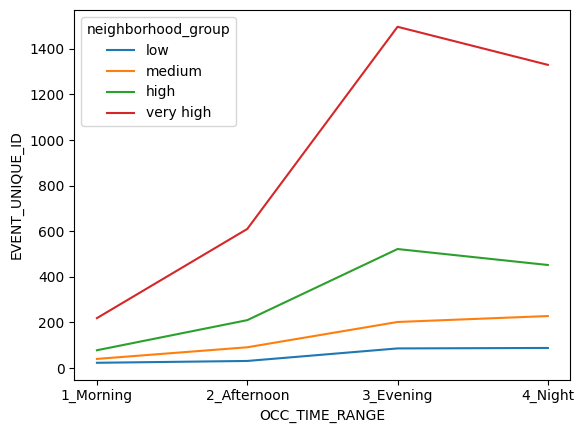

In [13]:
df_case_grouped_month = df_case_grouped.groupby(["OCC_TIME_RANGE","neighborhood_group"], as_index=False).sum()
sns.lineplot(data=df_case_grouped_month, x="OCC_TIME_RANGE", y="EVENT_UNIQUE_ID", hue="neighborhood_group")
plt.show()